In [4]:
%pip install  openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [774]:
crime_data = pd.read_table('C:/Users/madir/JupyterStonks/Education_Crime/data/Crime.tsv')

# Clean Crime Data

In [776]:
#206 counties with 0 crimes... could be coverage issues
crime_data["GRNDTOT"].value_counts()

GRNDTOT
0        206
23        10
12         9
170        8
75         8
        ... 
1305       1
1362       1
4445       1
18204      1
1092       1
Name: count, Length: 1952, dtype: int64

In [777]:
crime_data[crime_data["GRNDTOT"] == 0]

,STUDYNO,EDITION,PART,IDNO,FIPS_ST,FIPS_CTY,CPOPARST,AG_ARRST,JURFLAG,COVIND,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
81,9999,1,1,82,2,158,0,0,0,0.0000,...,0,0,0,0,0,0,0,0,0,0
82,9999,1,1,83,2,164,0,0,0,0.0000,...,0,0,0,0,0,0,0,0,0,0
91,9999,1,1,92,2,240,0,0,0,0.0000,...,0,0,0,0,0,0,0,0,0,0
94,9999,1,1,95,2,282,0,0,0,0.0000,...,0,0,0,0,0,0,0,0,0,0
95,9999,1,1,96,2,290,0,0,0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,9999,1,1,2630,48,155,1194,2,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
2686,9999,1,1,2687,48,269,280,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
2702,9999,1,1,2703,48,301,121,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
2841,9999,1,1,2842,50,9,6121,3,0,80.4634,...,0,0,0,0,0,0,0,0,0,0


In [778]:
#Exclude areas with < 50% coverage
crime_data = crime_data.drop(crime_data[(crime_data['COVIND'] < 50)].index.values)

In [779]:
crime_data[crime_data["GRNDTOT"] == 0]

,STUDYNO,EDITION,PART,IDNO,FIPS_ST,FIPS_CTY,CPOPARST,AG_ARRST,JURFLAG,COVIND,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
96,9999,1,1,97,2,777,0,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
394,9999,1,1,395,12,777,0,2,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
514,9999,1,1,515,13,243,7095,4,0,95.7294,...,0,0,0,0,0,0,0,0,0,0
546,9999,1,1,547,13,307,2620,1,0,83.3333,...,0,0,0,0,0,0,0,0,0,0
547,9999,1,1,548,13,309,7924,3,0,91.9801,...,0,0,0,0,0,0,0,0,0,0
1135,9999,1,1,1136,22,25,10068,1,0,91.6667,...,0,0,0,0,0,0,0,0,0,0
1243,9999,1,1,1244,25,777,0,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
1368,9999,1,1,1369,27,81,5741,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
1371,9999,1,1,1372,27,87,5457,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
1378,9999,1,1,1379,27,101,8348,3,0,100.0000,...,0,0,0,0,0,0,0,0,0,0


In [780]:
#Resetting index after dropping low coverage values
crime_data = crime_data.reset_index()
crime_data = crime_data.drop(['index'], axis=1)

In [781]:
#Dropping uneccesary columns
crime_data = crime_data.drop(['STUDYNO', 'EDITION', 'PART', 'IDNO','AG_ARRST', 'JURFLAG','P1TOT'], axis=1)

In [782]:
crime_data

,FIPS_ST,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
0,1,1,57135,98.5035,2796,68,356,7,4,14,...,60,130,19,110,34,0,1168,0,0,0
1,1,3,207584,96.2812,14765,491,1257,7,35,130,...,56,725,660,766,132,1,7625,0,0,0
2,1,5,26259,91.3039,881,49,174,4,1,16,...,7,60,4,55,21,0,263,0,0,0
3,1,7,22535,90.4619,751,36,60,0,7,4,...,3,66,15,9,12,0,373,0,0,0
4,1,9,57565,97.7122,2172,108,190,3,2,14,...,4,83,18,81,12,0,1164,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,56,37,44449,100.0000,1966,53,269,2,5,2,...,19,240,101,145,61,1,509,3,18,13
2776,56,41,20587,100.0000,780,12,66,1,0,0,...,39,113,23,45,36,0,205,0,30,1
2777,56,43,8213,100.0000,93,1,2,0,0,0,...,1,8,11,0,4,0,39,0,0,0
2778,56,45,7182,84.5168,243,9,24,0,1,0,...,8,35,8,9,7,0,46,0,0,2


In [783]:
#FIPS code for states
fips_states = {"1": "Alabama", "2": "Alaska", "4": "Arizona", "5": "Arkansas", "6": "California", "8": "Colorado", "9": "Connecticut", "10": "Delaware", "12": "Florida", "13": "Georgia", "15": "Hawaii", "16": "Idaho", "17": "Illinois", "18": "Indiana", "19": "Iowa", "20": "Kansas", "21": "Kentucky", "22": "Louisiana", "23": "Maine", "24": "Maryland", "25": "Massachusetts", "26": "Michigan", "27": "Minnesota", "28": "Mississippi", "29": "Missouri", "30": "Montana", "31": "Nebraska", "32": "Nevada", "33": "New Hampshire", "34": "New Jersey", "35": "New Mexico", "36": "New York", "37": "North Carolina", "38": "North Dakota", "39": "Ohio", "40": "Oklahoma", "41": "Oregon", "42": "Pennsylvania", "44": "Rhode Island", "45": "South Carolina", "46": "South Dakota", "47": "Tennessee", "48": "Texas", "49": "Utah", "50": "Vermont", "51": "Virginia", "53": "Washington", "54": "West Virginia", "55": "Wisconsin", "56": "Wyoming", "11": "District of Columbia", "72": "Puerto Rico"}

In [784]:
#Mapping FIPS codes to state names
crime_data['FIPS_ST'] = crime_data['FIPS_ST'].astype(str).map(fips_states)

In [785]:
crime_data[crime_data['FIPS_ST'] == 'Florida']['GRNDTOT']

307    0
Name: GRNDTOT, dtype: int64

### Graphing Crime Data

In [787]:
sns.set_theme()

In [788]:
mean_crime_data = crime_data.groupby(['FIPS_ST']).mean()
mean_crime_data

,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,AGASSLT,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
FIPS_ST,,,,,,,,,,,,,,,,,,,,,
Alabama,77.825397,72955.158730,93.308705,2666.539683,113.619048,319.761905,5.904762,6.698413,21.936508,78.936508,...,17.587302,138.301587,42.904762,121.047619,37.777778,1.063492,1184.841270,0.000000,0.000000,0.015873
Alaska,208.521739,32176.391304,97.761978,1284.826087,100.173913,152.478261,1.782609,5.652174,12.260870,80.391304,...,8.478261,133.652174,33.956522,4.869565,32.260870,0.173913,494.304348,0.000000,0.521739,0.043478
Arizona,61.562500,433191.937500,96.241019,18160.562500,758.562500,2521.875000,15.812500,22.625000,118.687500,601.250000,...,211.687500,1555.250000,651.937500,1030.125000,1094.000000,23.062500,4950.062500,8.875000,71.562500,203.937500
Arkansas,73.527778,41014.125000,97.886151,1987.833333,71.875000,212.750000,2.055556,4.333333,8.361111,57.083333,...,5.291667,99.083333,26.833333,100.458333,38.333333,12.875000,904.888889,0.000000,5.319444,2.986111
California,70.186441,665254.525424,99.787036,19146.762712,1820.644068,1966.033898,24.491525,43.576271,270.016949,1482.491525,...,4.220339,2216.796610,151.644068,1194.491525,66.949153,111.898305,4875.033898,0.000000,24.644068,56.949153
Colorado,73.278689,90629.245902,94.611202,4053.311475,114.934426,520.885246,2.540984,7.491803,16.196721,88.655738,...,54.442623,411.754098,162.786885,14.213115,134.508197,7.918033,1785.508197,0.016393,20.819672,49.639344
Connecticut,184.000000,357645.200000,99.921310,10208.600000,379.800000,1520.200000,6.600000,22.900000,103.100000,247.200000,...,148.500000,869.200000,23.100000,0.800000,1170.100000,3.600000,2708.200000,0.000000,0.400000,0.600000
Delaware,3.000000,317355.000000,99.969267,11240.333333,744.666667,2398.666667,11.000000,19.333333,176.333333,538.000000,...,65.000000,118.333333,296.666667,116.000000,439.333333,111.000000,1862.666667,0.000000,15.666667,0.000000
Florida,777.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [790]:
x_1 = mean_crime_data.index
y_1 = mean_crime_data['GRNDTOT']

<BarContainer object of 49 artists>

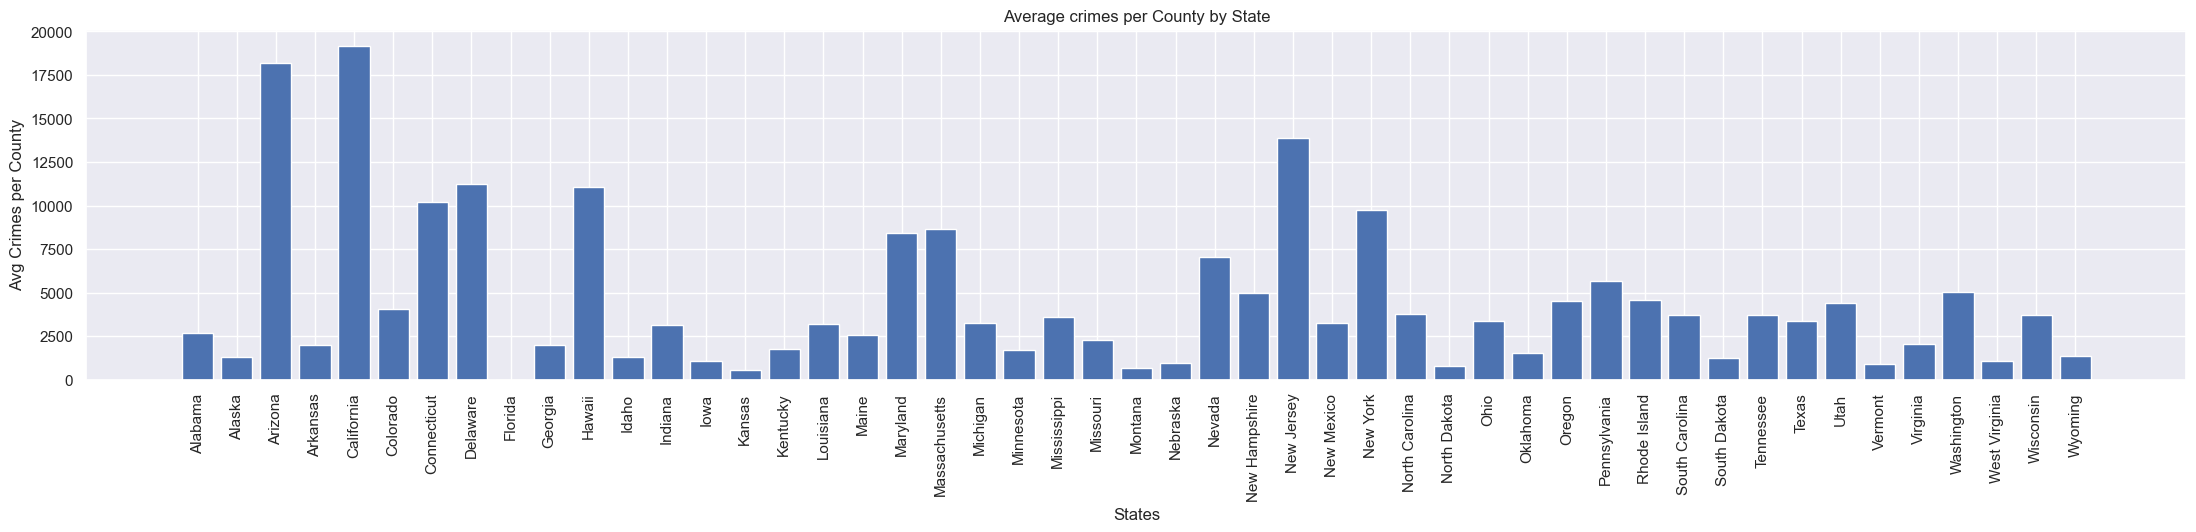

In [791]:
fig_1 = plt.figure(figsize=(30,5))
axes_1 = fig_1.add_axes([.3,.3,.7,.7])
axes_1.set_xlabel('States')
axes_1.set_ylabel('Avg Crimes per County')
axes_1.set_title('Average crimes per County by State')
plt.xticks(rotation = 'vertical')
plt.bar(x_1,y_1, width = .8)

### Investigating empty florida

In [793]:
crime_data_unchanged = pd.read_table('C:/Users/madir/JupyterStonks/Education_Crime/data/Crime.tsv')

In [794]:
florida_data = crime_data_unchanged[crime_data_unchanged['FIPS_ST'] == 12]

In [795]:
florida_data['COVIND'].value_counts()

COVIND
0.0      67
100.0     1
Name: count, dtype: int64

We can see that 67/68 counties have a coverage indicator of 0, which means Florida has pretty low coverage, and we should find a different dataset for florida

### Cleaning florida dataset 

In [798]:
florida_crime = pd.read_excel("C:/Users/madir/JupyterStonks/Education_Crime/data/florida.xlsx")

In [799]:
florida_crime

,"Total Reported Violent Crimes in Florida, by County and Offense, 2016",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Updated 05/22/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,County,Year,Population,Murder,Rape1,Robbery,Aggravated Assault,Total Violent Crime,% Violent Crime Change 15/16 ^,"Violent Crime Rate Per 100,000",Violent Crime Rate Change 15/16 ^
3,Alachua,2016,257062,4,216,271,966,1457,-2.672011,566.8,1.0699
4,Baker,2016,26965,1,4,8,105,118,6.306306,437.6,-2.386795
...,...,...,...,...,...,...,...,...,...,...,...
75,* Figures include the Orlando Pulse nightclub ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,"1 Beginning in 2013, the Federal Bureau of Inv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [800]:
florida_crime = florida_crime.iloc[2:]

In [801]:
florida_crime = florida_crime.iloc[:68]

In [802]:
florida_crime

,"Total Reported Violent Crimes in Florida, by County and Offense, 2016",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
2,County,Year,Population,Murder,Rape1,Robbery,Aggravated Assault,Total Violent Crime,% Violent Crime Change 15/16 ^,"Violent Crime Rate Per 100,000",Violent Crime Rate Change 15/16 ^
3,Alachua,2016,257062,4,216,271,966,1457,-2.672011,566.8,1.0699
4,Baker,2016,26965,1,4,8,105,118,6.306306,437.6,-2.386795
5,Bay,2016,176016,9,87,133,668,897,-0.993377,509.6,0.039262
6,Bradford,2016,27440,2,4,8,116,130,39.784946,473.8,25.676393
...,...,...,...,...,...,...,...,...,...,...,...
65,Union,2016,15887,2,0,2,33,37,105.555556,232.9,-20.782313
66,Volusia,2016,517351,19,148,337,1709,2213,-7.830071,427.8,1.350391
67,Wakulla,2016,31599,1,3,4,44,52,-39.534884,164.6,-26.419312
68,Walton,2016,62943,4,18,12,190,224,19.148936,355.9,-1.928906


In [803]:
florida_crime.columns = florida_crime.iloc[0]

In [804]:
florida_crime = florida_crime.iloc[1:]

In [805]:
florida_crime = florida_crime.reset_index()

In [806]:
florida_crime = florida_crime.drop(['index'], axis = 1)

In [807]:
florida_crime

2,County,Year,Population,Murder,Rape1,Robbery,Aggravated Assault,Total Violent Crime,% Violent Crime Change 15/16 ^,"Violent Crime Rate Per 100,000",Violent Crime Rate Change 15/16 ^
0,Alachua,2016,257062,4,216,271,966,1457,-2.672011,566.8,1.0699
1,Baker,2016,26965,1,4,8,105,118,6.306306,437.6,-2.386795
2,Bay,2016,176016,9,87,133,668,897,-0.993377,509.6,0.039262
3,Bradford,2016,27440,2,4,8,116,130,39.784946,473.8,25.676393
4,Brevard,2016,568919,20,255,451,2144,2870,-0.277971,504.5,4.235537
...,...,...,...,...,...,...,...,...,...,...,...
62,Union,2016,15887,2,0,2,33,37,105.555556,232.9,-20.782313
63,Volusia,2016,517351,19,148,337,1709,2213,-7.830071,427.8,1.350391
64,Wakulla,2016,31599,1,3,4,44,52,-39.534884,164.6,-26.419312
65,Walton,2016,62943,4,18,12,190,224,19.148936,355.9,-1.928906


### Combining Florida and USA crime data

In [809]:
crime_data

,FIPS_ST,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
0,Alabama,1,57135,98.5035,2796,68,356,7,4,14,...,60,130,19,110,34,0,1168,0,0,0
1,Alabama,3,207584,96.2812,14765,491,1257,7,35,130,...,56,725,660,766,132,1,7625,0,0,0
2,Alabama,5,26259,91.3039,881,49,174,4,1,16,...,7,60,4,55,21,0,263,0,0,0
3,Alabama,7,22535,90.4619,751,36,60,0,7,4,...,3,66,15,9,12,0,373,0,0,0
4,Alabama,9,57565,97.7122,2172,108,190,3,2,14,...,4,83,18,81,12,0,1164,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,Wyoming,37,44449,100.0000,1966,53,269,2,5,2,...,19,240,101,145,61,1,509,3,18,13
2776,Wyoming,41,20587,100.0000,780,12,66,1,0,0,...,39,113,23,45,36,0,205,0,30,1
2777,Wyoming,43,8213,100.0000,93,1,2,0,0,0,...,1,8,11,0,4,0,39,0,0,0
2778,Wyoming,45,7182,84.5168,243,9,24,0,1,0,...,8,35,8,9,7,0,46,0,0,2


In [810]:
crime_data['GRNDTOT'] = crime_data['MURDER'] + crime_data['RAPE'] + crime_data['ROBBERY'] + crime_data['AGASSLT']

In [811]:
crime_data.columns

Index(['FIPS_ST', 'FIPS_CTY', 'CPOPARST', 'COVIND', 'GRNDTOT', 'P1VLNT',
       'P1PRPTY', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'OTHASLT', 'FRGYCNT', 'FRAUD', 'EMBEZL', 'STLNPRP',
       'VANDLSM', 'WEAPONS', 'COMVICE', 'SEXOFF', 'DRUGTOT', 'DRGSALE',
       'COCSALE', 'MJSALE', 'SYNSALE', 'OTHSALE', 'DRGPOSS', 'COCPOSS',
       'MJPOSS', 'SYNPOSS', 'OTHPOSS', 'GAMBLE', 'BOOKMKG', 'NUMBERS',
       'OTGAMBL', 'OFAGFAM', 'DUI', 'LIQUOR', 'DRUNK', 'DISORDR', 'VAGRANT',
       'ALLOTHR', 'SUSPICN', 'CURFEW', 'RUNAWAY'],
      dtype='object')

In [812]:
#to combine the florida and usa dataset easily, lets remove the extra columns from crime_data
crime_data = crime_data.drop(['P1VLNT',
       'P1PRPTY', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'OTHASLT', 'FRGYCNT', 'FRAUD', 'EMBEZL', 'STLNPRP',
       'VANDLSM', 'WEAPONS', 'COMVICE', 'SEXOFF', 'DRUGTOT', 'DRGSALE',
       'COCSALE', 'MJSALE', 'SYNSALE', 'OTHSALE', 'DRGPOSS', 'COCPOSS',
       'MJPOSS', 'SYNPOSS', 'OTHPOSS', 'GAMBLE', 'BOOKMKG', 'NUMBERS',
       'OTGAMBL', 'OFAGFAM', 'DUI', 'LIQUOR', 'DRUNK', 'DISORDR', 'VAGRANT',
       'ALLOTHR', 'SUSPICN', 'CURFEW', 'RUNAWAY'], axis = 1)

In [813]:
crime_data

,FIPS_ST,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT
0,Alabama,1,57135,98.5035,68,7,4,14,43
1,Alabama,3,207584,96.2812,490,7,35,130,318
2,Alabama,5,26259,91.3039,49,4,1,16,28
3,Alabama,7,22535,90.4619,36,0,7,4,25
4,Alabama,9,57565,97.7122,108,3,2,14,89
...,...,...,...,...,...,...,...,...,...
2775,Wyoming,37,44449,100.0000,53,2,5,2,44
2776,Wyoming,41,20587,100.0000,12,1,0,0,11
2777,Wyoming,43,8213,100.0000,1,0,0,0,1
2778,Wyoming,45,7182,84.5168,9,0,1,0,8


In [814]:
crime_data = crime_data.drop(['CPOPARST', 'COVIND'], axis=1)

In [815]:
florida_crime

2,County,Year,Population,Murder,Rape1,Robbery,Aggravated Assault,Total Violent Crime,% Violent Crime Change 15/16 ^,"Violent Crime Rate Per 100,000",Violent Crime Rate Change 15/16 ^
0,Alachua,2016,257062,4,216,271,966,1457,-2.672011,566.8,1.0699
1,Baker,2016,26965,1,4,8,105,118,6.306306,437.6,-2.386795
2,Bay,2016,176016,9,87,133,668,897,-0.993377,509.6,0.039262
3,Bradford,2016,27440,2,4,8,116,130,39.784946,473.8,25.676393
4,Brevard,2016,568919,20,255,451,2144,2870,-0.277971,504.5,4.235537
...,...,...,...,...,...,...,...,...,...,...,...
62,Union,2016,15887,2,0,2,33,37,105.555556,232.9,-20.782313
63,Volusia,2016,517351,19,148,337,1709,2213,-7.830071,427.8,1.350391
64,Wakulla,2016,31599,1,3,4,44,52,-39.534884,164.6,-26.419312
65,Walton,2016,62943,4,18,12,190,224,19.148936,355.9,-1.928906


In [816]:
florida_list = []
for i in range(0,67):
    florida_list.append('Florida')

In [817]:
florida_crime['FIPS_ST'] = florida_list

In [818]:
florida_crime

2,County,Year,Population,Murder,Rape1,Robbery,Aggravated Assault,Total Violent Crime,% Violent Crime Change 15/16 ^,"Violent Crime Rate Per 100,000",Violent Crime Rate Change 15/16 ^,FIPS_ST
0,Alachua,2016,257062,4,216,271,966,1457,-2.672011,566.8,1.0699,Florida
1,Baker,2016,26965,1,4,8,105,118,6.306306,437.6,-2.386795,Florida
2,Bay,2016,176016,9,87,133,668,897,-0.993377,509.6,0.039262,Florida
3,Bradford,2016,27440,2,4,8,116,130,39.784946,473.8,25.676393,Florida
4,Brevard,2016,568919,20,255,451,2144,2870,-0.277971,504.5,4.235537,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Union,2016,15887,2,0,2,33,37,105.555556,232.9,-20.782313,Florida
63,Volusia,2016,517351,19,148,337,1709,2213,-7.830071,427.8,1.350391,Florida
64,Wakulla,2016,31599,1,3,4,44,52,-39.534884,164.6,-26.419312,Florida
65,Walton,2016,62943,4,18,12,190,224,19.148936,355.9,-1.928906,Florida


In [819]:
florida_crime = florida_crime.iloc[:, [11,0,7,3,4,5,6]]

In [821]:
florida_crime

2,FIPS_ST,County,Total Violent Crime,Murder,Rape1,Robbery,Aggravated Assault
0,Florida,Alachua,1457,4,216,271,966
1,Florida,Baker,118,1,4,8,105
2,Florida,Bay,897,9,87,133,668
3,Florida,Bradford,130,2,4,8,116
4,Florida,Brevard,2870,20,255,451,2144
...,...,...,...,...,...,...,...
62,Florida,Union,37,2,0,2,33
63,Florida,Volusia,2213,19,148,337,1709
64,Florida,Wakulla,52,1,3,4,44
65,Florida,Walton,224,4,18,12,190


In [822]:
crime_data.columns

Index(['FIPS_ST', 'FIPS_CTY', 'GRNDTOT', 'MURDER', 'RAPE', 'ROBBERY',
       'AGASSLT'],
      dtype='object')

In [823]:
florida_crime.columns = ['FIPS_ST', 'FIPS_CTY', 'GRNDTOT', 'MURDER', 'RAPE', 'ROBBERY',
       'AGASSLT']

In [824]:
florida_crime

,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT
0,Florida,Alachua,1457,4,216,271,966
1,Florida,Baker,118,1,4,8,105
2,Florida,Bay,897,9,87,133,668
3,Florida,Bradford,130,2,4,8,116
4,Florida,Brevard,2870,20,255,451,2144
...,...,...,...,...,...,...,...
62,Florida,Union,37,2,0,2,33
63,Florida,Volusia,2213,19,148,337,1709
64,Florida,Wakulla,52,1,3,4,44
65,Florida,Walton,224,4,18,12,190


In [825]:
crime_data

,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT
0,Alabama,1,68,7,4,14,43
1,Alabama,3,490,7,35,130,318
2,Alabama,5,49,4,1,16,28
3,Alabama,7,36,0,7,4,25
4,Alabama,9,108,3,2,14,89
...,...,...,...,...,...,...,...
2775,Wyoming,37,53,2,5,2,44
2776,Wyoming,41,12,1,0,0,11
2777,Wyoming,43,1,0,0,0,1
2778,Wyoming,45,9,0,1,0,8


In [826]:
#we iloc from 307 and 308 because we want to exculde row 307, because that is the empty florida row.
final_crime_data = pd.concat([crime_data.iloc[:307], florida_crime, crime_data.iloc[308:]])

In [827]:
final_crime_data = final_crime_data.reset_index()

In [828]:
final_crime_data = final_crime_data.drop(['index'], axis=1)

In [829]:
final_crime_data

,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT
0,Alabama,1,68,7,4,14,43
1,Alabama,3,490,7,35,130,318
2,Alabama,5,49,4,1,16,28
3,Alabama,7,36,0,7,4,25
4,Alabama,9,108,3,2,14,89
...,...,...,...,...,...,...,...
2841,Wyoming,37,53,2,5,2,44
2842,Wyoming,41,12,1,0,0,11
2843,Wyoming,43,1,0,0,0,1
2844,Wyoming,45,9,0,1,0,8


### Some visualizations for fun

In [831]:
#function that removes all non-numeric charecters from a string
def remove_chars(s):
    if isinstance(s, int): 
        return s
    no_commas = s.replace(',', '')
    no_star = s.replace('*', '')
    number = int(no_star)
    return number

In [832]:
final_crime_data['GRNDTOT'] = final_crime_data['GRNDTOT'].apply(remove_chars)
final_crime_data['MURDER'] = final_crime_data['MURDER'].apply(remove_chars)
final_crime_data['RAPE'] = final_crime_data['RAPE'].apply(remove_chars)
final_crime_data['ROBBERY'] = final_crime_data['ROBBERY'].apply(remove_chars)
final_crime_data['AGASSLT'] = final_crime_data['AGASSLT'].apply(remove_chars)

In [833]:
final_crime_data.dtypes

FIPS_ST     object
FIPS_CTY    object
GRNDTOT      int64
MURDER       int64
RAPE         int64
ROBBERY      int64
AGASSLT      int64
dtype: object

In [834]:
#lets replace the florida county names with their FIPS_CTY code to make the column an int64 column
county_fips = {'Alachua': '1',    'Baker': '3',    'Bay': '5',    'Bradford': '7',    'Brevard': '9',    'Broward': '11',    'Calhoun': '13',    'Charlotte': '15',    'Citrus': '17',    'Clay': '19',   'Collier': '21',    'Columbia': '23',    'Miami Dade': '86',    'Desoto': '27',    'Dixie': '29',    'Duval': '31',    'Escambia': '33',    'Flagler': '35',    'Franklin': '37',    'Gadsden': '39',    'Gilchrist': '41',    'Glades': '43',    'Gulf': '45',    'Hamilton': '47',    'Hardee': '49',    'Hendry': '51',    'Hernando': '53',    'Highlands': '55',    'Hillsborough': '57',    'Holmes': '59',    'Indian River': '61',    'Jackson': '63',    'Jefferson': '65',    'Lafayette': '67',    'Lake': '69',    'Lee': '71',    'Leon': '73',    'Levy': '75',   'Liberty': '77',    'Madison': '79',    'Manatee': '81',    'Marion': '83',    'Martin': '85',    'Monroe': '87',    'Nassau': '89',    'Okaloosa': '91',    'Okeechobee': '93',    'Orange *': '95',    'Osceola': '97',    'Palm Beach': '99',    'Pasco': '101',    'Pinellas': '103',    'Polk': '105',    'Putnam': '107',    'St. Johns': '109',    'St. Lucie': '111',    'Santa Rosa': '113',    'Sarasota': '115',    'Seminole': '117',    'Sumter': '119',    'Suwannee': '121',    'Taylor': '123',    'Union': '125',    'Volusia': '127',    'Wakulla': '129',    'Walton': '131', 'Washington': '133'}

In [835]:
final_crime_data['FIPS_CTY'] = final_crime_data['FIPS_CTY'].replace(county_fips).astype(int)

In [836]:
mean_fcrime_data = final_crime_data.groupby(['FIPS_ST']).mean()

In [837]:
x_1 = mean_fcrime_data.index
y_1 = mean_fcrime_data['GRNDTOT']

<BarContainer object of 49 artists>

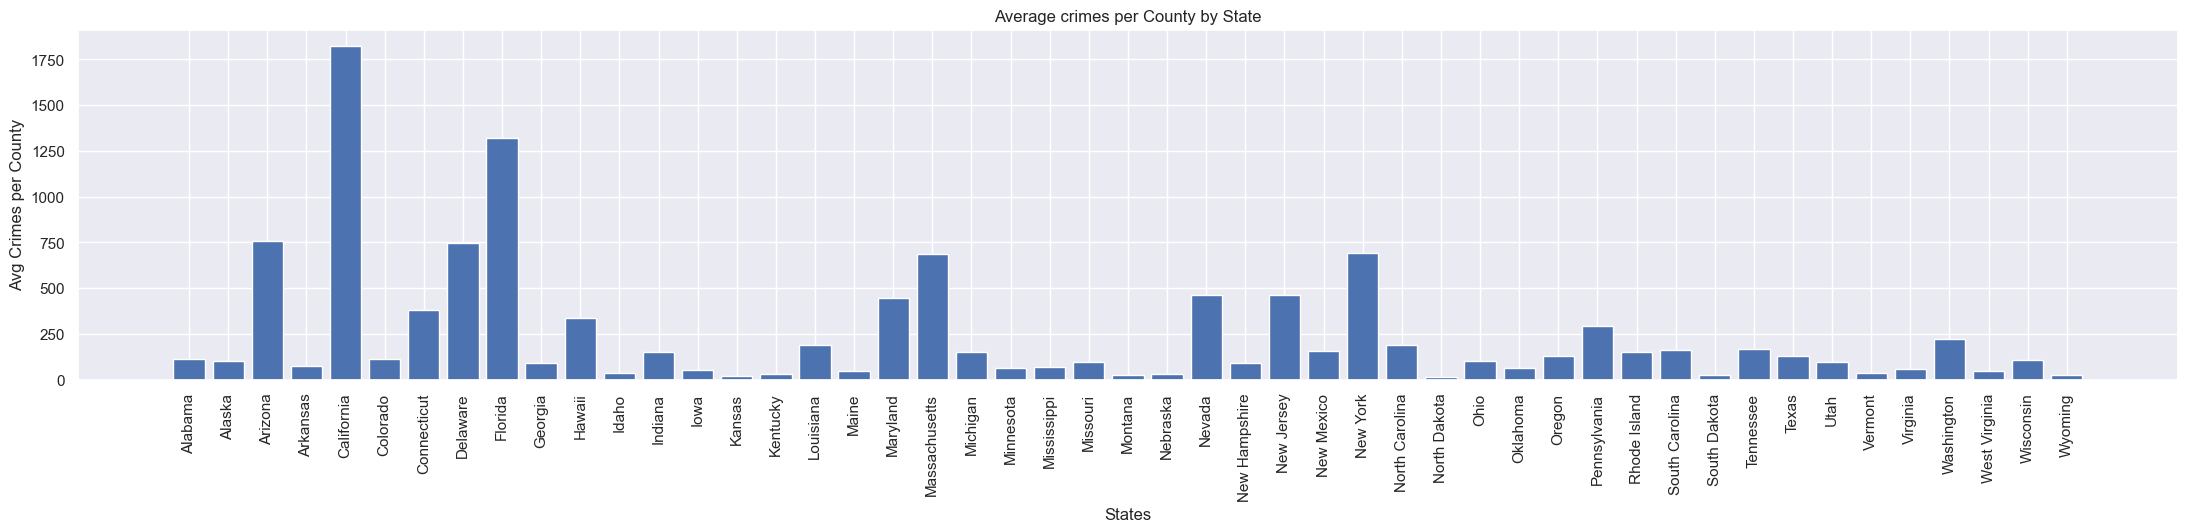

In [838]:
fig_1 = plt.figure(figsize=(30,5))
axes_1 = fig_1.add_axes([.3,.3,.7,.7])
axes_1.set_xlabel('States')
axes_1.set_ylabel('Avg Crimes per County')
axes_1.set_title('Average crimes per County by State')
plt.xticks(rotation = 'vertical')
plt.bar(x_1,y_1, width = .8)

These results are skewed by the population differences between states/counties, so lets add in population data

### Adding in population data and finding which countties have available data

In [841]:
population_data = pd.read_csv('../data/PopulationUSA.csv')

In [842]:
population_data

,Label (Grouping),Total
0,"Baldwin County, Alabama",NaN
1,Estimate,"208,563"
2,"Calhoun County, Alabama",NaN
3,Estimate,"114,611"
4,"Cullman County, Alabama",NaN
...,...,...
1657,Estimate,"73,980"
1658,"Toa Baja Municipio, Puerto Rico",NaN
1659,Estimate,"80,207"
1660,"Trujillo Alto Municipio, Puerto Rico",NaN


In [843]:
new_column = list(population_data.loc[1:, 'Total'])

In [844]:
population_data = population_data.iloc[:-1]
population_data

,Label (Grouping),Total
0,"Baldwin County, Alabama",NaN
1,Estimate,"208,563"
2,"Calhoun County, Alabama",NaN
3,Estimate,"114,611"
4,"Cullman County, Alabama",NaN
...,...,...
1656,"Toa Alta Municipio, Puerto Rico",NaN
1657,Estimate,"73,980"
1658,"Toa Baja Municipio, Puerto Rico",NaN
1659,Estimate,"80,207"


In [845]:
population_data.insert(2,'Total1',new_column) 

In [846]:
population_data

,Label (Grouping),Total,Total1
0,"Baldwin County, Alabama",NaN,"208,563"
1,Estimate,"208,563",NaN
2,"Calhoun County, Alabama",NaN,"114,611"
3,Estimate,"114,611",NaN
4,"Cullman County, Alabama",NaN,"82,471"
...,...,...,...
1656,"Toa Alta Municipio, Puerto Rico",NaN,"73,980"
1657,Estimate,"73,980",NaN
1658,"Toa Baja Municipio, Puerto Rico",NaN,"80,207"
1659,Estimate,"80,207",NaN


In [847]:
# removing the rows with 'Estimate'
population_data = population_data[population_data['Label (Grouping)'].str.contains('Estimate') == False]

In [848]:
population_data = population_data.drop('Total', axis=1)

In [849]:
population_data = population_data.reset_index()

In [850]:
population_data

,index,Label (Grouping),Total1
0,0,"Baldwin County, Alabama","208,563"
1,2,"Calhoun County, Alabama","114,611"
2,4,"Cullman County, Alabama","82,471"
3,6,"DeKalb County, Alabama","70,900"
4,8,"Elmore County, Alabama","81,799"
...,...,...,...
826,1652,"Ponce Municipio, Puerto Rico","145,278"
827,1654,"San Juan Municipio, Puerto Rico","347,052"
828,1656,"Toa Alta Municipio, Puerto Rico","73,980"
829,1658,"Toa Baja Municipio, Puerto Rico","80,207"


We now convert these county names into their FIPS code so that we can match counties between population_data and final_crime_data

In [852]:
import addfips as adfip

In [854]:
# function that turns the Label (Grouping) column into fips codes
def county_fips_converter(x):
    af = adfip.AddFIPS()
    fips_code = af.get_county_fips(x.split(',')[0], state=x.split(',')[1].strip())
    return fips_code
    
    

In [855]:
population_data['FIPS_CTY'] = population_data['Label (Grouping)'].apply(lambda x: county_fips_converter(x))

In [856]:
population_data

,index,Label (Grouping),Total1,FIPS_CTY
0,0,"Baldwin County, Alabama","208,563",01003
1,2,"Calhoun County, Alabama","114,611",01015
2,4,"Cullman County, Alabama","82,471",01043
3,6,"DeKalb County, Alabama","70,900",01049
4,8,"Elmore County, Alabama","81,799",01051
...,...,...,...,...
826,1652,"Ponce Municipio, Puerto Rico","145,278",72113
827,1654,"San Juan Municipio, Puerto Rico","347,052",72127
828,1656,"Toa Alta Municipio, Puerto Rico","73,980",72135
829,1658,"Toa Baja Municipio, Puerto Rico","80,207",72137


In [857]:
# the first 2 numbers correlate with the names of the state in which the county is in, so lets remove them and add in a state column instead
population_data['FIPS_CTY'] = population_data['FIPS_CTY'].apply(lambda x: x[2:].strip('0'))

In [858]:
population_data

,index,Label (Grouping),Total1,FIPS_CTY
0,0,"Baldwin County, Alabama","208,563",3
1,2,"Calhoun County, Alabama","114,611",15
2,4,"Cullman County, Alabama","82,471",43
3,6,"DeKalb County, Alabama","70,900",49
4,8,"Elmore County, Alabama","81,799",51
...,...,...,...,...
826,1652,"Ponce Municipio, Puerto Rico","145,278",113
827,1654,"San Juan Municipio, Puerto Rico","347,052",127
828,1656,"Toa Alta Municipio, Puerto Rico","73,980",135
829,1658,"Toa Baja Municipio, Puerto Rico","80,207",137


In [859]:
population_data['Label (Grouping)'] = population_data['Label (Grouping)'].apply(lambda x: x.split(',')[1].strip())

In [860]:
# now we have the state name and FIPS county code for each entry
population_data['State_CTY'] = population_data['Label (Grouping)'] + population_data['FIPS_CTY']

In [861]:
final_crime_data['State_CTY'] = final_crime_data['FIPS_ST'] + final_crime_data['FIPS_CTY'].astype(str)

In [862]:
population_data

,index,Label (Grouping),Total1,FIPS_CTY,State_CTY
0,0,Alabama,"208,563",3,Alabama3
1,2,Alabama,"114,611",15,Alabama15
2,4,Alabama,"82,471",43,Alabama43
3,6,Alabama,"70,900",49,Alabama49
4,8,Alabama,"81,799",51,Alabama51
...,...,...,...,...,...
826,1652,Puerto Rico,"145,278",113,Puerto Rico113
827,1654,Puerto Rico,"347,052",127,Puerto Rico127
828,1656,Puerto Rico,"73,980",135,Puerto Rico135
829,1658,Puerto Rico,"80,207",137,Puerto Rico137


In [863]:
final_data = final_crime_data[final_crime_data['State_CTY'].isin(population_data['State_CTY'])]
      

In [864]:
final_data = final_data.reset_index()
final_data = final_data.drop(['index'], axis=1)

In [865]:
list1 = []

In [866]:
final_data['Population'] = population_data[population_data['State_CTY'].isin(final_data['State_CTY'])]['Total1'].reset_index().drop(['index'], axis=1)

In [867]:
final_data['Population']= final_data['Population'].str.replace(',','')
final_data['Crime_Rates'] = (final_data['GRNDTOT']/final_data['Population'].astype(int))*100000

In [868]:
final_data

,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT,State_CTY,Population,Crime_Rates
0,Alabama,3,490,7,35,130,318,Alabama3,208563,234.941001
1,Alabama,15,303,8,17,65,213,Alabama15,114611,264.372530
2,Alabama,43,28,1,4,3,20,Alabama43,82471,33.951328
3,Alabama,49,39,2,1,1,35,Alabama49,70900,55.007052
4,Alabama,55,185,7,4,35,139,Alabama55,102564,180.375180
...,...,...,...,...,...,...,...,...,...,...
766,Wisconsin,133,225,24,27,51,123,Wisconsin133,134296,167.540359
767,Wisconsin,139,200,1,5,38,156,Wisconsin139,398424,50.197779
768,Wisconsin,141,15,1,5,2,7,Wisconsin141,169886,8.829450
769,Wyoming,21,99,1,6,9,83,Wyoming21,73107,135.417949


In [869]:
x_1 = final_data['State_CTY'][0:10]
y_1 = final_data['Crime_Rates'][0:10]

<BarContainer object of 10 artists>

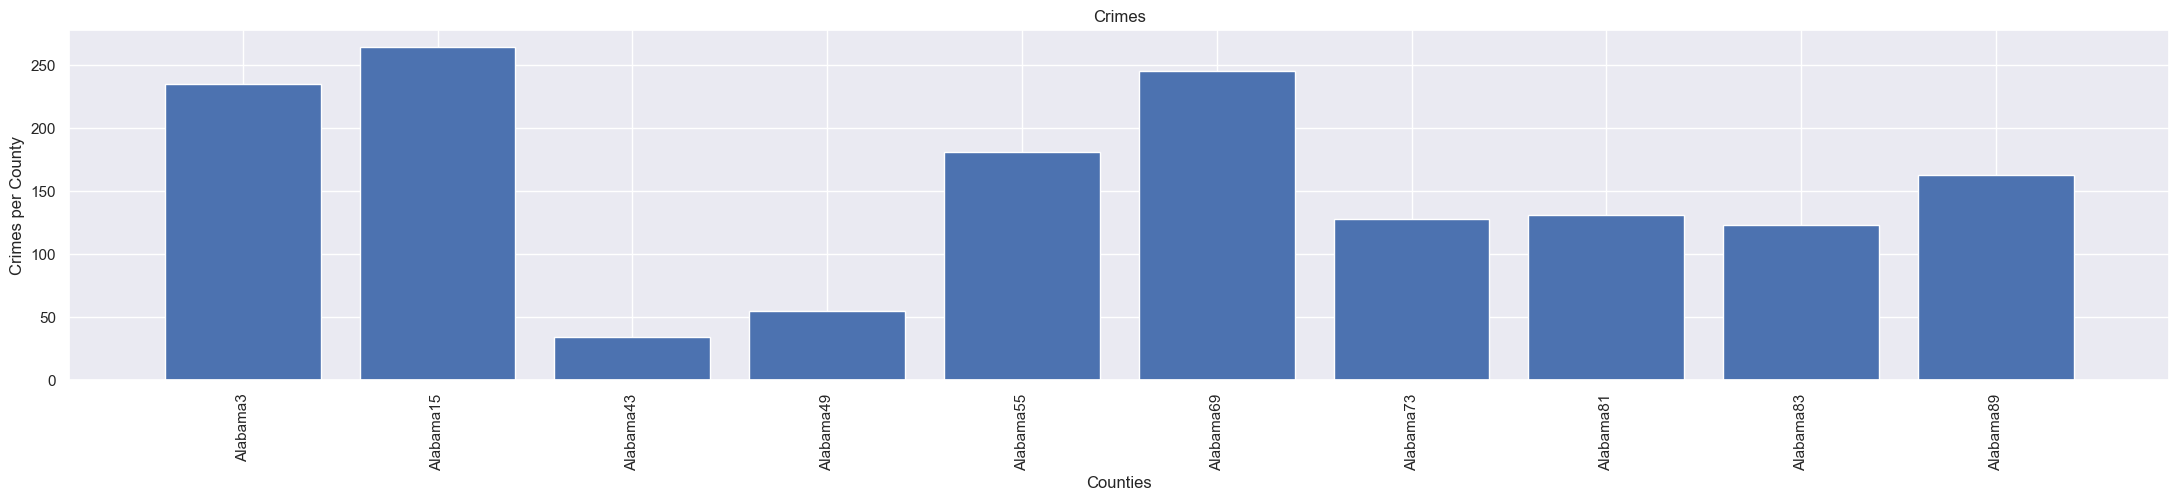

In [870]:
fig_1 = plt.figure(figsize=(30,5))
axes_1 = fig_1.add_axes([.3,.3,.7,.7])
axes_1.set_xlabel('Counties')
axes_1.set_ylabel('Crimes per County')
axes_1.set_title('Crimes')
plt.xticks(rotation = 'vertical')
plt.bar(x_1,y_1, width = .8)

### Cleaning education data and merging with final_data

In [872]:
education_data = pd.read_csv('../data/ReliableEduData.csv')

In [873]:
education_data

,Label (Grouping),Population 25 years and over,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,"Baldwin County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,"146,987","4,322","10,506","41,822","31,210","15,580","25,524","18,023",(X),(X)
3,Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Estimate,(X),2.9%,7.1%,28.5%,21.2%,10.6%,17.4%,12.3%,89.9%,29.6%
...,...,...,...,...,...,...,...,...,...,...,...
10798,Estimate,(X),10.7%,7.1%,26.6%,19.6%,9.0%,18.5%,8.4%,82.2%,26.9%
10799,Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10800,Estimate,"26,119","2,481",828,"6,750","3,307","2,547","7,008","3,198",(X),(X)
10801,Percent Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [874]:
education_data = education_data.drop(education_data.iloc[1::13].index, axis=0)

In [875]:
education_data

,Label (Grouping),Population 25 years and over,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,"Baldwin County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,"146,987","4,322","10,506","41,822","31,210","15,580","25,524","18,023",(X),(X)
3,Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Estimate,(X),2.9%,7.1%,28.5%,21.2%,10.6%,17.4%,12.3%,89.9%,29.6%
5,Males,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10798,Estimate,(X),10.7%,7.1%,26.6%,19.6%,9.0%,18.5%,8.4%,82.2%,26.9%
10799,Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10800,Estimate,"26,119","2,481",828,"6,750","3,307","2,547","7,008","3,198",(X),(X)
10801,Percent Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [876]:
education_data = education_data.drop(education_data.iloc[2::12].index, axis=0)

In [877]:
education_data.reset_index()

,index,Label (Grouping),Population 25 years and over,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,0,"Baldwin County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Estimate,"146,987","4,322","10,506","41,822","31,210","15,580","25,524","18,023",(X),(X)
2,4,Estimate,(X),2.9%,7.1%,28.5%,21.2%,10.6%,17.4%,12.3%,89.9%,29.6%
3,5,Males,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Estimate,"69,793","2,123","6,679","18,636","14,226","6,182","14,148","7,799",(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...
9136,10798,Estimate,(X),10.7%,7.1%,26.6%,19.6%,9.0%,18.5%,8.4%,82.2%,26.9%
9137,10799,Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9138,10800,Estimate,"26,119","2,481",828,"6,750","3,307","2,547","7,008","3,198",(X),(X)
9139,10801,Percent Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
index_list = []

In [ ]:
for i in range(3,11):
    index_list.extend(education_data.iloc[i::11].index)

In [ ]:
education_data = education_data.drop(index_list,axis=0).reset_index(drop=True)

In [ ]:
education_data

In [ ]:
education_data_temp = education_data.loc[:, education_data.columns != 'Label (Grouping)']

In [ ]:
education_data_temp    

In [ ]:
education_data_temp = education_data_temp.drop(0, axis=0)

In [ ]:
education_data_temp

In [ ]:
education_data_temp.loc[2493] = (education_data_temp.loc[3])

In [ ]:
education_data_temp = education_data_temp.reset_index()

In [ ]:
education_data_temp['Label (Grouping)'] = education_data.loc[:, 'Label (Grouping)']

In [ ]:
education_data = education_data_temp

In [ ]:
education_data

In [ ]:
education_data = education_data.drop(['index'], axis=1)

In [ ]:
education_data = education_data.drop(education_data.iloc[2::3].index, axis=0)

In [ ]:
education_data

In [ ]:
education_data = education_data.reset_index(drop=True)

In [ ]:
education_data['FIPS_CTY'] = np.repeat(education_data['Label (Grouping)'].iloc[0::2].apply(lambda x: county_fips_converter(x)),2).reset_index(drop=True)

In [ ]:
# the estimates column has this weird syntax
education_data['Label (Grouping)'][1]

In [ ]:
def seperator_func(x):
    if x == '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Estimate':
        return x
    else:
        return x.split(',')[1].strip()

In [ ]:
future_column = education_data['Label (Grouping)'].apply(lambda x: seperator_func(x)).iloc[0::2].reset_index(drop=True)

In [ ]:
#realized that I can just keep the estimate columns and drop everything else

In [ ]:
education_data = education_data.iloc[1::2].reset_index(drop=True)

In [ ]:
education_data['Label (Grouping)'] = future_column

In [ ]:
education_data['FIPS_CTY'] = education_data['FIPS_CTY'].apply(lambda x: x[2:].strip('0'))

In [ ]:
education_data['State_CTY'] = education_data['Label (Grouping)']+education_data['FIPS_CTY']

In [ ]:
education_data = education_data.drop(['Label (Grouping)', 'FIPS_CTY'], axis=1)

In [ ]:
education_data

In [ ]:
final_education_data = pd.merge(final_data, education_data, on='State_CTY')

In [ ]:
final_education_data

In [ ]:
final_data = final_education_data.drop(['Population 25 years and over'], axis=1)

In [ ]:
for i in range(10,19):
    final_data.iloc[:,i] = final_data.iloc[:,i].apply(lambda x: x.strip('%'))

    

In [ ]:
final_data

In [ ]:
final_data.describe()

In [ ]:
final_data.to_csv('../data/final_data.csv')